In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_excel('DS Internship - EDA - Data.xlsx')

### Initial exploration

In [74]:
df.value_counts('Year')

Year
2016    38209
2017    37589
2018    35983
2019    33766
2015    32944
2020     2746
Name: count, dtype: int64

In [75]:
""" 
Find total sales by year.
"""
sales_per_year = df.groupby('Year')['Sales'].sum()

sales_per_year

Year
2015    1.627585e+09
2016    1.843939e+09
2017    1.651322e+09
2018    1.492340e+09
2019    1.471963e+09
2020    6.510899e+07
Name: Sales, dtype: float64

In [76]:
""" 
Number of stores opened in the year 1991.
"""

df['open_year'] = df['Store Open'].dt.year
print(df['open_year'].value_counts()[1991])
df.drop('open_year', axis=1, inplace=True)

819


In [77]:
""" 
How many stores were remodelled during this period? (Consider all types of remodelling)
"""

"""
The store modification column includes 'no change', 'relocation', 'expansion', and 'remodelling'.

By the phrasing 'all types of remodelling', I assume that expansion and remodel are both included as types of remodelling

I am also assuming that each super division counts as a separate store, so if a store was remodelled 
multiple times, it would count as multiple remodels.
"""

df['Store Modification Date'] = pd.to_datetime(df['Store Modification Date'], errors='coerce')

df['store mod'] = df['Store Modification Date'].dt.year
# print(df['store mod'].value_counts()[1991])
df['store mod'].value_counts()

"""
No stores were remodellled in 1991

If instead you mean: How many stores were remodelled overall in the period, we can see it as follows
"""

df['Store Modification'].value_counts()['remodel'] + df['Store Modification'].value_counts()['expansion']

34014

0.13922544019446917


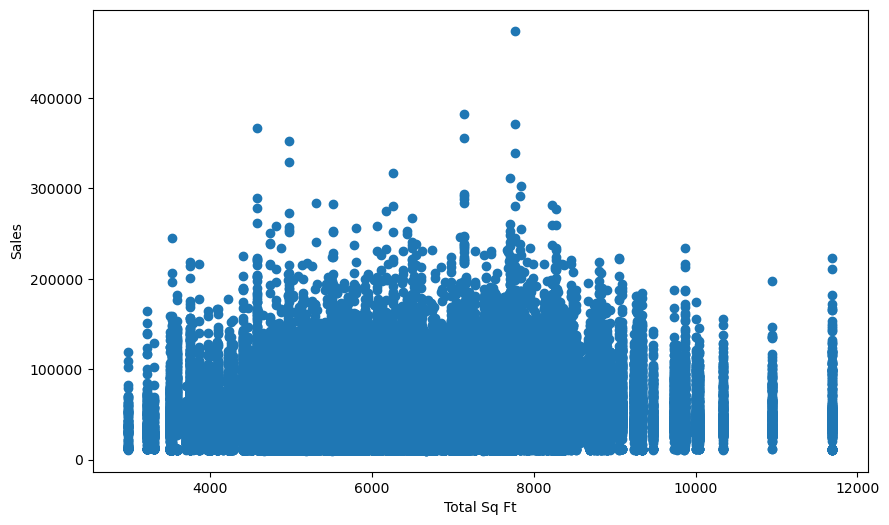

In [79]:
"""
Find the direct relationship (if any) between Sales and total sq. ft.
"""

"""      
As we can see below, there does not seem to be a direct relationship between sales and total sq. ft.

From correlation we are looking at whether there is a linear relationship, but from the scatter
plot it also is not immediattely apparent what the relationship might me if there is one.
"""

plt.figure(figsize=(10, 6))
plt.scatter(df['Total Sq Ft'], df['Sales'])
plt.xlabel('Total Sq Ft')
plt.ylabel('Sales')

print(df['Sales'].corr(df['Total Sq Ft']))
plt.show()

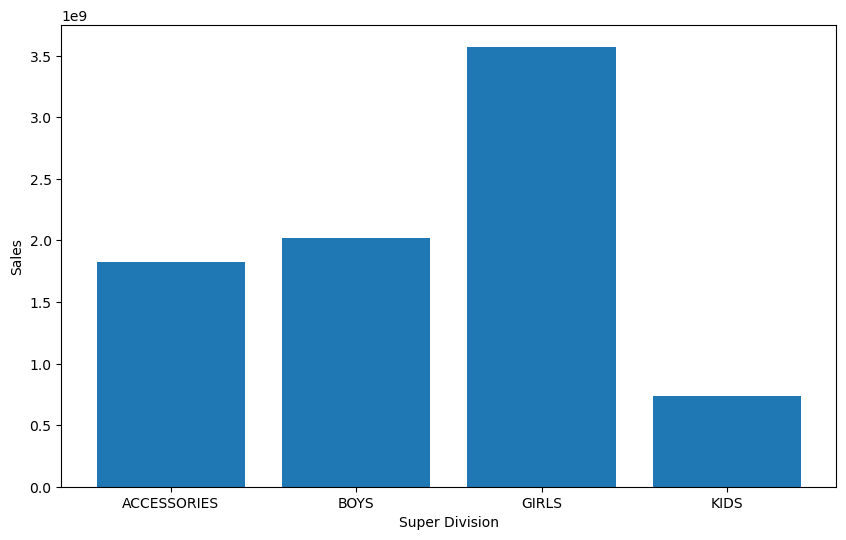

In [80]:
"""
Which Super division is most profitable?
"""

"""
From how I understand the data, Sales is meant to be 'revenue' and profitability is not directly given.

However, assuming that all super divisions have a similar profit margin, we can use sales as a proxy.

As we can see below, the most profitable super division is GIRLS
"""

sales_per_division = df.groupby('Super Division')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(sales_per_division.index, sales_per_division.values)
plt.xlabel('Super Division')
plt.ylabel('Sales')
plt.show()


In [92]:
"""
How many stores are active as of today?
"""

temp_df = df[df['Store Close'] == 'No Close date']

print(temp_df['Store'].unique().shape[0])


678


Super Division
ACCESSORIES    6328.970473
BOYS           6328.820336
GIRLS          6328.090895
KIDS           6344.792952
Name: Total Sq Ft, dtype: float64


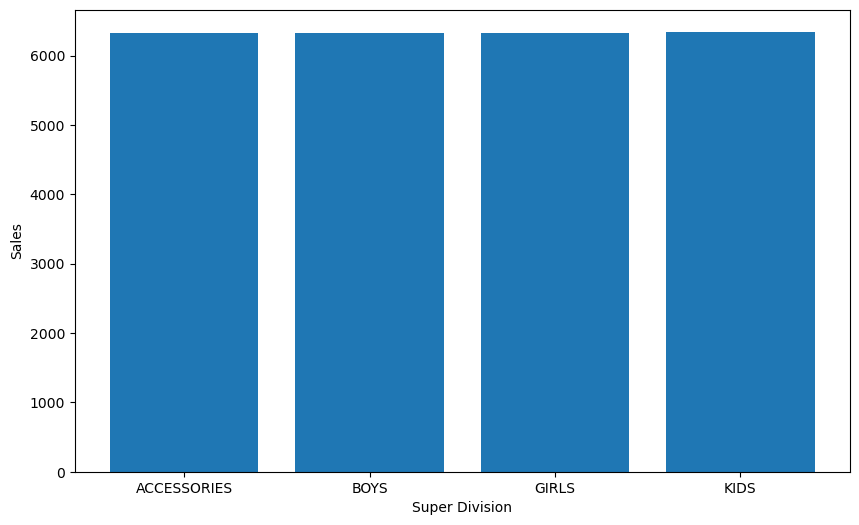

In [96]:
"""
Which super division has more sq. ft on an average across all the stores?
"""

"""      
As we can see from the bar graph, it"""

sales_per_division = df.groupby('Super Division')['Total Sq Ft'].mean()

print(sales_per_division)

plt.figure(figsize=(10, 6))
plt.bar(sales_per_division.index, sales_per_division.values)
plt.xlabel('Super Division')
plt.ylabel('Sales')
plt.show()

### Advanced Insights

State
E4    58183.380314
B6    50044.942593
B5    49776.118243
Name: Sales, dtype: float64


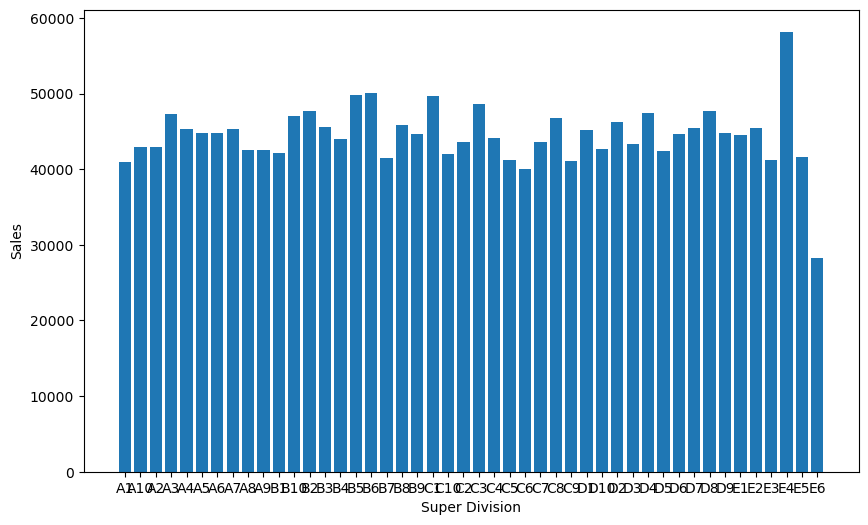

In [106]:
"""
What are the top 3 potential candidate states to consider for opening a new store?
"""
"""     
To determine the top 3 potential candidate states, we can look at the average sales per state.

From this, we can see that E4 is a top performer, yet the other two top performers are not as clear."""

sales_per_division = df.groupby('State')['Sales'].mean()

print(sales_per_division.sort_values(ascending=False).head(3))

plt.figure(figsize=(10, 6))
plt.bar(sales_per_division.index, sales_per_division.values)
plt.xlabel('Super Division')
plt.ylabel('Sales')
plt.show()

Store Open
3    45347.999806
2    45307.312559
4    44830.878568
Name: Sales, dtype: float64


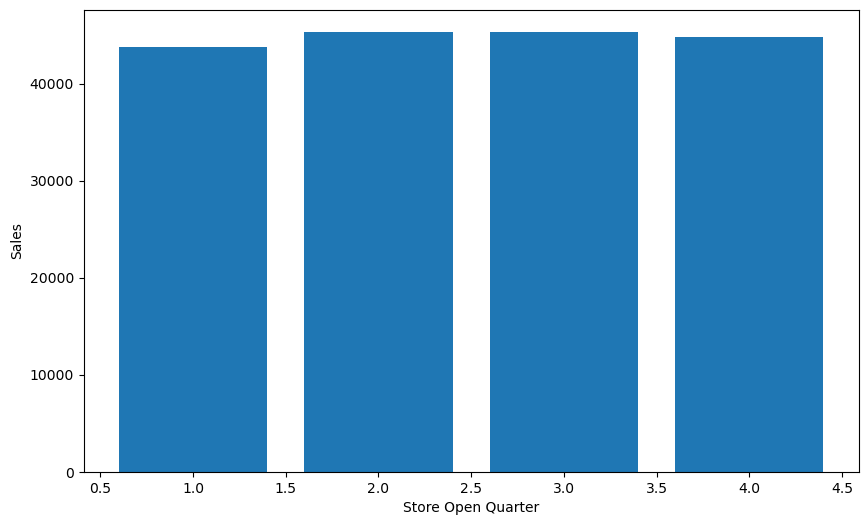

Climate
Hot     47118.072805
Warm    46151.345812
Cold    44012.549839
Name: Sales, dtype: float64


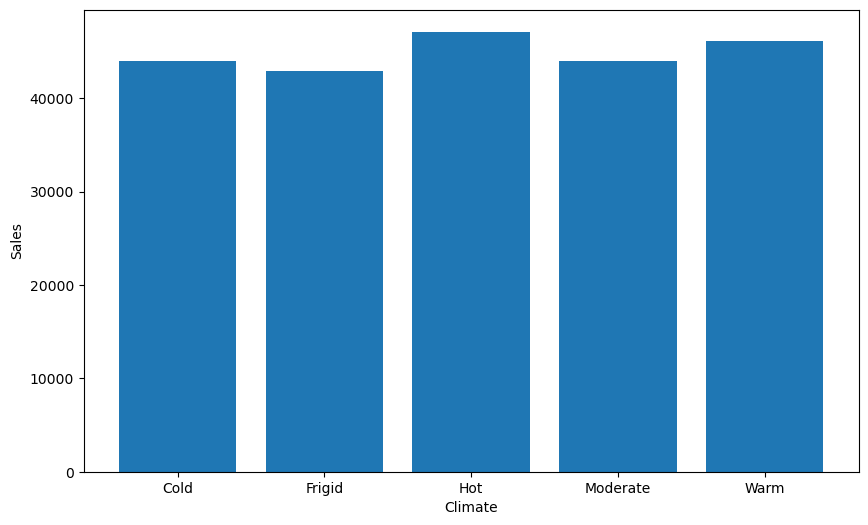

In [112]:
"""       
What is the best time of the year to consider opening a store?
"""

"""      
We can see this in two ways. We could first look at the quarter of the year that has the highest average sales.

Alternatively we can use climate as a proxy for season and see which climate has the highest average sales.

As we can see below, there seem to be only minor differenecs based on quarter, although Q2 seems to be the best.

However, the climate seems to have a more significant impact, with Hot climate and being the best time to open a store.
"""

sales_per_division = df.groupby(df['Store Open'].dt.quarter)['Sales'].mean()

print(sales_per_division.sort_values(ascending=False).head(3))

plt.figure(figsize=(10, 6))
plt.bar(sales_per_division.index, sales_per_division.values)
plt.xlabel('Store Open Quarter')
plt.ylabel('Sales')
plt.show()

sales_per_division = df.groupby('Climate')['Sales'].mean()

print(sales_per_division.sort_values(ascending=False).head(3))

plt.figure(figsize=(10, 6))
plt.bar(sales_per_division.index, sales_per_division.values)
plt.xlabel('Climate')
plt.ylabel('Sales')
plt.show()

In [127]:
"""      
Are there any “outlet-type” effects towards store closures?
"""

"""      
As we can see below, Malls are the least likely type to close, while outlets are most likely to close
"""

df['Is store closed'] = df['Store Close'] != 'No Close date'
# 1 is closed, 0 is open

df.groupby('Outlet Type')['Is store closed'].mean()

Outlet Type
Mall      0.059397
Outlet    0.225496
Strip     0.187519
Name: Is store closed, dtype: float64

In [128]:
"""      
Just to be sure also we see that there is a significant number of each type of store
so we can make a reasonable conclusion from the data.
"""

df['Outlet Type'].value_counts()

Outlet Type
Mall      86233
Strip     73518
Outlet    21486
Name: count, dtype: int64